In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from utils.data import load_tc_data
from utils.plot import make_cmap
import cftime as cf
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from netCDF4 import Dataset
from numpy import inf

In [15]:
disc_pred = np.load('/user/home/al18709/work/gan_predictions_20/validation_disc_pred-opt_modular_part2_raw.npy')
gen_pred = np.load('/user/home/al18709/work/gan_predictions_20/validation_pred-opt_modular_part2_raw.npy')
inputs = np.load('/user/work/al18709/tc_data_flipped/KE_tracks/valid_X.npy')

In [4]:
print(disc_pred.shape)
print(inputs.shape)

(15930, 1, 20)
(15930, 6)


In [5]:
print(disc_pred[10,0,2])

17.025676727294922


/tmp/ipykernel_68977/2021203715.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(disc_pred[:,0,0], shade=True, color="blue")


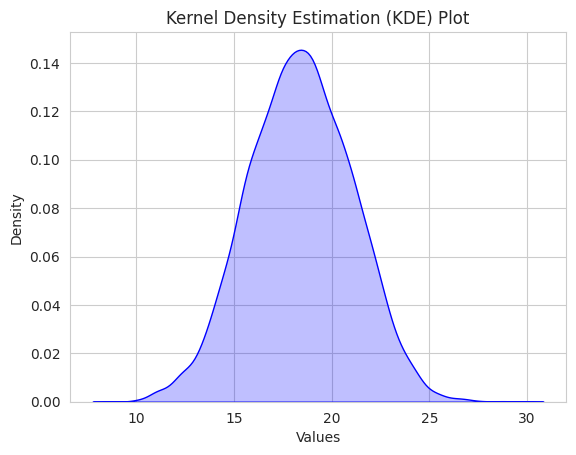

In [6]:
sns.set_style("whitegrid")  # You can change the style to your preference
sns.kdeplot(disc_pred[:,0,0], shade=True, color="blue")
plt.title("Kernel Density Estimation (KDE) Plot")
plt.xlabel("Values")
plt.ylabel("Density")
plt.show()

In [7]:
percentiles = np.arange(0,100,10)
pred_p = np.percentile(disc_pred[:,0,0], percentiles)
min = np.min(disc_pred[:,0,0])
max = np.max(disc_pred[:,0,0])
limits = [0] * 10
limits[-1] = max
limits[0:-1] = pred_p

In [8]:
print(pred_p)
print(limits)

[ 8.92525864 14.96593647 16.0939621  16.95206013 17.69553413 18.38889217
 19.06957703 19.8239563  20.69867058 21.85323524]
[8.92525863647461, 14.965936470031739, 16.093962097167967, 16.9520601272583, 17.69553413391113, 18.38889217376709, 19.069577026367188, 19.823956298828126, 20.69867057800293, 21.853235244750977, 29.681215286254883]


In [9]:

p_10 = inputs[(disc_pred[:,0,0] > limits[0]) & (disc_pred[:,0,0] < limits[1]),:]
p_20 = inputs[(disc_pred[:,0,0] > limits[1]) & (disc_pred[:,0,0] < limits[2]),:]
p_30 = inputs[(disc_pred[:,0,0] > limits[2]) & (disc_pred[:,0,0] < limits[3]),:]
p_40 = inputs[(disc_pred[:,0,0] > limits[3]) & (disc_pred[:,0,0] < limits[4]),:]
p_50 = inputs[(disc_pred[:,0,0] > limits[4]) & (disc_pred[:,0,0] < limits[5]),:]
p_60 = inputs[(disc_pred[:,0,0] > limits[5]) & (disc_pred[:,0,0] < limits[6]),:]
p_70 = inputs[(disc_pred[:,0,0] > limits[6]) & (disc_pred[:,0,0] < limits[7]),:]
p_80 = inputs[(disc_pred[:,0,0] > limits[7]) & (disc_pred[:,0,0] < limits[8]),:]
p_90 = inputs[(disc_pred[:,0,0] > limits[8]) & (disc_pred[:,0,0] < limits[9]),:]
p_100 = inputs[(disc_pred[:,0,0] > limits[9]) & (disc_pred[:,0,0] < limits[10]),:]


In [10]:
print(p_10.shape)
print(p_100.shape)

(1592, 6)
(1592, 6)


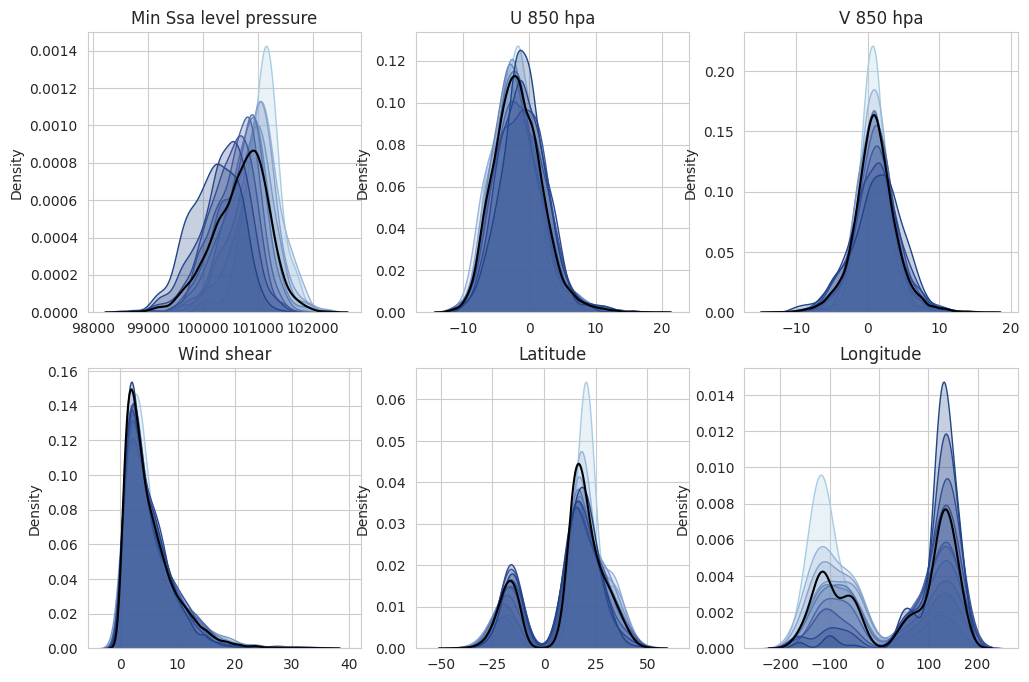

In [14]:
sns.set_style("whitegrid")  # You can change the style to your preference

fig, axes = plt.subplots(2, 3, figsize=(12, 8))
titles = ['Min Sea level pressure', 'U 850 hpa', 'V 850 hpa', 'Wind shear', 'Latitude', 'Longitude']
for i in range(6):
    row, col = divmod(i, 3)
    sns.kdeplot(p_10[:,i], fill=True, color="#A8CCE3", ax=axes[row,col])
    sns.kdeplot(p_20[:,i], fill=True, color="#98B5D9", ax=axes[row,col])
    sns.kdeplot(p_30[:,i], fill=True, color="#89A0CF", ax=axes[row,col])
    sns.kdeplot(p_40[:,i], fill=True, color="#799AC5", ax=axes[row,col])
    sns.kdeplot(p_50[:,i], fill=True, color="#6A88BB", ax=axes[row,col])
    sns.kdeplot(p_60[:,i], fill=True, color="#5B78B0", ax=axes[row,col])
    sns.kdeplot(p_70[:,i], fill=True, color="#4C67A6", ax=axes[row,col])
    sns.kdeplot(p_80[:,i], fill=True, color="#3E579C", ax=axes[row,col])
    sns.kdeplot(p_90[:,i], fill=True, color="#2F4792", ax=axes[row,col])
    sns.kdeplot(p_100[:,i], fill=True, color="#204587", ax=axes[row,col])
    sns.kdeplot(inputs[:,i],fill=False, color="Black", ax=axes[row,col])
    axes[row,col].set_title(titles[i])
    # axes[row,col].set_xlabel("Values")
    axes[row,col].set_ylabel("Density")
# plt.title("Kernel Density Estimation (KDE) Plot")
# plt.xlabel("Values")
# plt.ylabel("Density")
plt.show()

In [20]:
pred_10 = gen_pred[(disc_pred[:,0,0] > limits[0]) & (disc_pred[:,0,0] < limits[1]),:,:]
pred_100 = gen_pred[(disc_pred[:,0,0] > limits[9]) & (disc_pred[:,0,0] < limits[10]),:,:]

In [31]:
sns.set_style("white")
width_ratios = [1,1]
n = 6
m = 2
fig, axes = plt.subplots(n, m, figsize=(2*m + 0.5, 2*n), sharey=True,gridspec_kw={'width_ratios': width_ratios})


pal = sns.cubehelix_palette(10, rot=-.25, light=.7,as_cmap=True)

for i in range(m):
	for j in range(n):
		axes[j,i].set(xticklabels=[])
		axes[j,i].set(yticklabels=[])
		axes[j,0].spines['bottom'].set_visible(False)
		axes[j,0].spines['top'].set_visible(False)
		axes[j,0].spines['left'].set_visible(False)
		axes[j,0].spines['right'].set_visible(False)
		axes[j,-1].spines['bottom'].set_visible(False)
		axes[j,-1].spines['top'].set_visible(False)
		axes[j,-1].spines['left'].set_visible(False)
		axes[j,-1].spines['right'].set_visible(False)

# define cmap
precip_cmap,precip_norm = make_cmap()
norm = precip_norm

storms = np.random.randint(0,1000,6)
print(storms)
	
im = axes[0,0].imshow(pred_10[storms[0],:,:,0], interpolation='nearest', norm=norm,extent=None,cmap=precip_cmap)
axes[0,0].invert_yaxis()
axes[1,0].imshow(pred_10[storms[1],:,:,0], interpolation='nearest', norm=norm,extent=None,cmap=precip_cmap)
axes[1,0].invert_yaxis()
axes[2,0].imshow(pred_10[storms[2],:,:,0], interpolation='nearest', norm=norm,extent=None,cmap=precip_cmap)
axes[2,0].invert_yaxis()
axes[3,0].imshow(pred_10[storms[3],:,:,0], interpolation='nearest', norm=norm,extent=None,cmap=precip_cmap)
axes[3,0].invert_yaxis()
axes[4,0].imshow(pred_10[storms[4],:,:,0], interpolation='nearest', norm=norm,extent=None,cmap=precip_cmap)
axes[4,0].invert_yaxis()
axes[5,0].imshow(pred_10[storms[5],:,:,0], interpolation='nearest', norm=norm,extent=None,cmap=precip_cmap)
axes[5,0].invert_yaxis()

axes[0,1].imshow(pred_100[storms[0],:,:,0], interpolation='nearest', norm=norm,extent=None,cmap=precip_cmap)
axes[0,1].invert_yaxis()
axes[1,1].imshow(pred_100[storms[1],:,:,0], interpolation='nearest', norm=norm,extent=None,cmap=precip_cmap)
axes[1,1].invert_yaxis()
axes[2,1].imshow(pred_100[storms[2],:,:,0], interpolation='nearest', norm=norm,extent=None,cmap=precip_cmap)
axes[2,1].invert_yaxis()
axes[3,1].imshow(pred_100[storms[3],:,:,0], interpolation='nearest', norm=norm,extent=None,cmap=precip_cmap)
axes[3,1].invert_yaxis()
axes[4,1].imshow(pred_100[storms[4],:,:,0], interpolation='nearest', norm=norm,extent=None,cmap=precip_cmap)
axes[4,1].invert_yaxis()
axes[5,1].imshow(pred_100[storms[5],:,:,0], interpolation='nearest', norm=norm,extent=None,cmap=precip_cmap)
axes[5,1].invert_yaxis()






	# axes[j,0].set_ylabel('Scalar WGAN',rotation=0,horizontalalignment='right',fontsize=48,labelpad=4,fontweight='bold',color='#56a1d7')
	# axes[j+1,0].set_ylabel('Modular WGAN',rotation=0,horizontalalignment='right',fontsize=48,labelpad=4,fontweight='bold',color='#56a1d7')
	# axes[j+2,0].set_ylabel('WGAN + inputs',rotation=0,horizontalalignment='right',fontsize=48,labelpad=4,fontweight='bold',color='#56a1d7')
	# axes[j+3,0].set_ylabel('WGAN',rotation=0,horizontalalignment='right',fontsize=48,labelpad=4,fontweight='bold',color='#56a1d7')
	# axes[j+4,0].set_ylabel('MSWEP',horizontalalignment='right',rotation=0,fontsize=48,labelpad=4,fontweight='bold',color='#56a1d7')
	

fig.subplots_adjust(right=0.8)
# cbar_ax = fig.add_axes([1, 0.15, 0.05, 0.7])
cbar_ax = fig.add_axes([1, 0.031, 0.03, 0.936])
levels=[0, 1, 2, 3, 5, 7, 10, 15, 20, 25, 30, 40, 50, 70, 100, 150]
cb = fig.colorbar(im, cax=cbar_ax,shrink=0.01,ticks=levels)
cb.ax.tick_params(labelsize=12)
cb.set_label('mm / 3hr', fontsize=16)
fig.tight_layout()

plt.savefig('figure_9a.png',bbox_inches='tight',dpi=600)
plt.clf()


[530 776 681 295 182 912]


/tmp/ipykernel_68977/3745003966.py:75: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


<Figure size 450x1200 with 0 Axes>

In [ ]:
levels = [10, 15, 20, 25, 30, 40, 50,75, 100,140,180,200,250,300]
sns.set_style("white")
sns.set_context("notebook")
vmin=-2
vmax=2


fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
rain1 = np.sum(grid_rain,axis=0) > 50
rain2 = np.sum(grid_rain_truth,axis=0) > 50
hit = (rain1 == True) & (rain2 == True)
miss = (rain1 == False) & (rain2 == True)
false_alarm = (rain1 == True) & (rain2 == False)
correct_rejection = (rain1 == False) & (rain2 == False)
rain_data = hit + 2* miss + 3* false_alarm + 4*correct_rejection
ax.contourf(lon,-lat + 12,data,levels=range(1,200000,20000), transform=ccrs.PlateCarree(),cmap='Oranges')
m = ax.contourf(grid_x,grid_y,rain_data, transform=ccrs.PlateCarree(),alpha=0.8)


ax.add_feature(cfeature.COASTLINE,linewidth=0.5)
ax.add_feature(cfeature.LAND, zorder=100,color='black',alpha=0.1)


# plt.contourf(storm.precipitation[0,:,:,0],storm.storm_lats[0,:,:],storm.storm_lons[0,:,:])


# ax.outline_patch.set_linewidth(0.5)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
			linewidth=0.5, color='gray', alpha=0.5, linestyle='-')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlabel_style = {'size': 14}
gl.ylabel_style = {'size': 14}
# ax.set_xticklabels(labelsize=20)
# ax.set_yticklabels(labelsize=20)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

precip_cmap,precip_norm = make_cmap(high_vals=True)
# cbar = plt.colorbar(c,fraction=1.5, pad=-0.7,cmap=precip_cmap,ticks=levels,boundaries=levels, format='%1i',cax=ax)
# cbar.ax.tick_params(labelsize=8,width=0.5)
# cbar.ax.tick_params(labelsize=20)
# plt.colorbar(m, ticks=[1,2,3,4],label=['hit','miss','false alarm','correct rejection'])
# plt.legend(['Hit','Miss','False Alarm','Correct Rejection'],loc='lower left')
ax.set_extent([grid_x[0,0], grid_x[-1,-1], grid_y[0,0], grid_y[-1,-1]], crs=ccrs.PlateCarree())
ax.set_title('Hit and Miss',fontsize=26,pad=15)

plt.savefid('figure_9b.png')